In [57]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import sqlite3
import dash
from dash import dcc
from dash import html


df = pd.read_excel("CERM21_Case2_Data_ENG.xlsx")


In [58]:
df.head()

,LoanID,Disbursement Date,Contractual Currrency,Loan Amount USD Equiv,Tenor Months,Monthly Installment USD Equiv,Gender,Age Years,Civil Status,Education Level,Years At Address,Own/Rent Home,Number Dependents,Years In Business,Regional Office,Avg Arrear Days 3 Months,Number Employees or Family Helping,Business Sector,Monthly Sales USD equiv.,Arrears Days Disbursement+12m
0,FWSPG_1,2020-07-15 12:00:00,KES,5100,45,162,Female,53,Married,Completed Elementary School,18.0,Own,7,11.0,Region2,3,4.0,Food Services / Hospitality,945.896963,0
1,LGBXO_2,2020-07-24 12:00:00,USD,2200,21,119,Male,52,Single,University Level Courses,6.5,Rent,0,1.5,Region5,2.5,0.0,Food Services / Hospitality,520.272704,23
2,RLPSY_3,2020-07-27 12:00:00,KES,5450,42,179,Female,42,Widowed,Completed Elementary School,8.5,Own,2,2.0,Region3,3,3.0,Agriculture,1320.578897,0
3,TBYWD_4,2020-07-18 12:00:00,KES,4850,33,192,Female,38,Married,Some Secondary School,2.0,Rent,0,0.0,Region4,1.75,2.0,Retail Trading,2335.718963,0
4,BLUXI_5,2020-07-26 12:00:00,USD,1250,9,147,Male,35,Married,Completed Vocational Training,7.5,Own,2,1.0,Region6,2.75,0.0,Retail Trading,1909.234414,0


In [59]:
con = sqlite3.connect(":memory:")

df.to_sql("loans", con)

33500

In [60]:
columns_list = df.columns.to_list()
columns_list

['LoanID',
 'Disbursement Date',
 'Contractual Currrency',
 'Loan Amount USD Equiv',
 'Tenor Months',
 'Monthly Installment USD Equiv',
 'Gender',
 'Age Years',
 'Civil Status',
 'Education Level',
 'Years At Address',
 'Own/Rent Home',
 'Number Dependents',
 'Years In Business',
 'Regional Office',
 'Avg Arrear Days 3 Months',
 'Number Employees or Family Helping',
 'Business Sector',
 'Monthly Sales USD equiv.',
 'Arrears Days Disbursement+12m']

In [61]:
descriptive_table = pd.DataFrame()

for column in columns_list:
    counts = df[column].value_counts()
    descriptive_table[column] = [counts.get('None', 0)]
descriptive_table.index = ['None']

descriptive_table

,LoanID,Disbursement Date,Contractual Currrency,Loan Amount USD Equiv,Tenor Months,Monthly Installment USD Equiv,Gender,Age Years,Civil Status,Education Level,Years At Address,Own/Rent Home,Number Dependents,Years In Business,Regional Office,Avg Arrear Days 3 Months,Number Employees or Family Helping,Business Sector,Monthly Sales USD equiv.,Arrears Days Disbursement+12m
None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
spec_table = pd.DataFrame()

spec = ['min', 'max', 'avg', 'std', 'median']
numeric_columns_list = df.select_dtypes(include=['int','float'])

for column in numeric_columns_list:
    mins = df[column].min()
    maxs = df[column].max()
    avgs = df[column].mean()
    stds = df[column].std()
    medians = df[column].median()
    spec_table[column] = [mins, maxs, avgs, stds, medians]
spec_table.index = spec

spec_table

,Loan Amount USD Equiv,Tenor Months,Monthly Installment USD Equiv,Age Years,Years At Address,Number Dependents,Years In Business,Number Employees or Family Helping,Monthly Sales USD equiv.,Arrears Days Disbursement+12m
min,350.000000,6.000000,46.000000,18.000000,0.000000,0.000000,0.000000,0.000000,257.299264,0.000000
max,6850.000000,48.000000,274.000000,70.000000,26.000000,7.000000,25.000000,6.000000,4325.000000,273.000000
avg,3342.256716,25.692716,159.244448,44.197045,8.232433,2.732806,3.075821,0.868552,1266.286444,11.520060
std,1603.445892,12.765700,36.799317,13.478852,5.637269,2.110725,3.336119,1.208189,683.418825,30.871422
median,3300.000000,24.000000,159.000000,45.000000,7.500000,2.000000,2.000000,0.000000,1052.904658,0.000000


In [63]:
catigorical_columns_list = df.select_dtypes(include='object')

for column in catigorical_columns_list:
    modes = df[column].mode()
    print(modes)
#     catigorical_columns_list[column] = [modes]
# catigorical_columns_list.index = 'mode'

0        AAAYL_29442
1         AAAZP_3241
2         AADXU_2538
3         AAEVP_7350
4         AAEWB_6717
            ...     
33495      ZZYOA_647
33496    ZZYYT_23021
33497    ZZZAX_12687
33498    ZZZFV_13703
33499    ZZZVD_29731
Name: LoanID, Length: 33500, dtype: object
0    KES
Name: Contractual Currrency, dtype: object
0    Female
Name: Gender, dtype: object
0    Married
Name: Civil Status, dtype: object
0    Secondary School to Grade 10
Name: Education Level, dtype: object
0    Own
Name: Own/Rent Home, dtype: object
0    Region3
Name: Regional Office, dtype: object
0    2.75
Name: Avg Arrear Days 3 Months, dtype: object
0    Retail Trading
Name: Business Sector, dtype: object


## 30 days

In [64]:
Arrears_Days_Disbursement = 'Arrears Days Disbursement+12m'
ADD_table_30 = pd.DataFrame()

ADD_table_30['ADD binary'] = df[Arrears_Days_Disbursement].apply(lambda x: 1 if x>30 else 0)

counts = ADD_table_30["ADD binary"].value_counts()
counts

0    29920
1     3580
Name: ADD binary, dtype: int64

## 45 days

In [87]:
Arrears_Days_Disbursement = 'Arrears Days Disbursement+12m'
ADD_table_45 = pd.DataFrame()

ADD_table_45['ADD binary'] = df[Arrears_Days_Disbursement].apply(lambda x: 1 if x>45 else 0)

counts = ADD_table_45["ADD binary"].value_counts()
counts

0    31508
1     1992
Name: ADD binary, dtype: int64

# 90 days

In [66]:
Arrears_Days_Disbursement = 'Arrears Days Disbursement+12m'
ADD_table_90 = pd.DataFrame()

ADD_table_90['ADD binary'] = df[Arrears_Days_Disbursement].apply(lambda x: 1 if x>90 else 0)
counts = ADD_table_90["ADD binary"].value_counts()
counts

0    32447
1     1053
Name: ADD binary, dtype: int64

## One Hot Encoding

### Currency

In [67]:
currency_table = pd.get_dummies(df['Contractual Currrency'])
currency_table

,KES,USD
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
33495,1,0
33496,1,0
33497,0,1
33498,0,1


### Gender

In [68]:
gender_table = pd.get_dummies(df['Gender'])
gender_table

,Female,Male
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
33495,0,1
33496,1,0
33497,1,0
33498,0,1


### Civil Status

In [69]:
civil_status_table = pd.get_dummies(df['Civil Status'])
civil_status_table

,Divorced,Married,Single,Widowed
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
33495,0,1,0,0
33496,1,0,0,0
33497,1,0,0,0
33498,0,0,1,0


### Education Level

In [70]:
education_table = pd.get_dummies(df['Education Level'])
education_table

,Completed Elementary School,Completed Vocational Training,Secondary School to Grade 10,Some Secondary School,University Level Courses
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
33495,0,1,0,0,0
33496,1,0,0,0,0
33497,1,0,0,0,0
33498,0,0,0,0,1


### Own/Rent Home

In [71]:
home_table = pd.get_dummies(df['Own/Rent Home'])
home_table

,Own,Rent
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
33495,1,0
33496,0,1
33497,0,1
33498,0,1


### Regional Office

In [72]:
office_table = pd.get_dummies(df['Regional Office'])
office_table

,Region1,Region2,Region3,Region4,Region5,Region6
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
33495,1,0,0,0,0,0
33496,0,0,0,1,0,0
33497,0,0,0,0,1,0
33498,0,0,0,0,1,0


### Business Sector

In [73]:
business_table = pd.get_dummies(df['Business Sector'])
business_table

,Agriculture,Artisan,Construction Trades,Food Services / Hospitality,Personal Services,Retail Trading
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
33495,0,0,0,1,0,0
33496,0,0,0,0,0,1
33497,0,0,0,0,0,1
33498,0,0,0,0,1,0


# Standard Scaler

                  0             1             2             3             4  \
count  3.350000e+04  3.350000e+04  3.350000e+04  3.350000e+04  3.350000e+04   
mean   2.661884e-17  8.070493e-17 -2.435995e-16 -1.693637e-16 -1.266251e-16   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.866169e+00 -1.542650e+00 -3.077398e+00 -1.943595e+00 -1.460380e+00   
25%   -8.683034e-01 -8.376255e-01 -7.403631e-01 -7.565330e-01 -8.395029e-01   
50%   -2.635408e-02 -1.326008e-01 -6.642825e-03  5.957237e-02 -1.299288e-01   
75%    8.467785e-01  8.074322e-01  7.270774e-01  8.014864e-01  6.683420e-01   
max    2.187661e+00  1.747465e+00  3.118462e+00  1.914357e+00  3.151851e+00   

                  5             6             7             8             9  
count  3.350000e+04  3.350000e+04  2.843700e+04  3.350000e+04  3.350000e+04  
mean  -5.981285e-17  1.474111e-17 -7.483474e-17 -9.565814e-17  1.262009e-17  
std    1.000015e+00  1.000015e+00  1.000018e+00  1.000

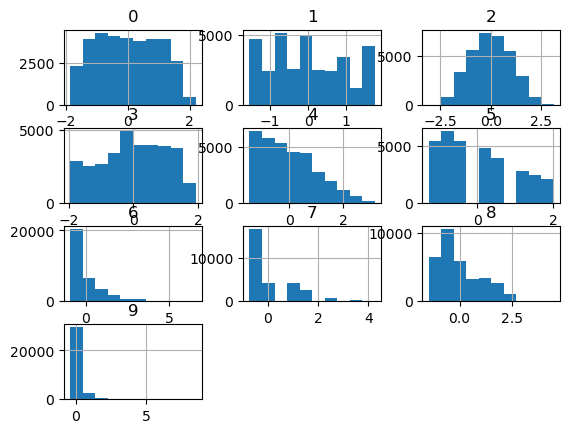

,0,1,2,3,4,5,6,7,8,9
0,1.096245,1.512457,0.074882,0.653104,1.732703,2.021703,2.375304,2.591898,-0.468811,-0.373168
1,-0.712387,-0.367609,-1.093636,0.578912,-0.307322,-1.294743,-0.472359,-0.718900,-1.091607,0.371869
2,1.314528,1.277449,0.536854,-0.163002,0.047465,-0.347187,-0.322482,1.764198,0.079444,-0.373168
3,0.940328,0.572424,0.890126,-0.459767,-1.105593,-1.294743,-0.921990,0.936499,1.564851,-0.373168
4,-1.304870,-1.307642,-0.332741,-0.682342,-0.129929,-0.347187,-0.622236,-0.718900,0.940796,-0.373168
...,...,...,...,...,...,...,...,...,...,...
33495,0.160746,0.337416,-0.251216,-0.459767,0.934432,1.074147,-0.322482,-0.718900,-0.732675,-0.373168
33496,-0.400554,-0.367609,-0.251216,-0.459767,-1.371683,-0.347187,-0.921990,-0.718900,1.040399,0.436654
33497,-1.273686,-1.542650,1.732546,-0.163002,1.111826,0.126591,-0.472359,-0.718900,1.350451,0.242297
33498,-0.088721,-0.132601,-0.224041,0.727295,1.377916,-0.820965,0.127149,-0.718900,-0.933921,-0.373168


In [92]:
# visualize a standard scaler transform of the sonar dataset
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

data = df.select_dtypes(include=['int','float'])
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()
dataset

In [96]:
combined_data_categories = pd.concat([office_table, home_table, education_table,civil_status_table,gender_table,currency_table, business_table], axis=1)

scaler = StandardScaler()
combined_data_categories = scaler.fit_transform(combined_data_categories)
dataset_2 = DataFrame(combined_data_categories)
combined_data = pd.concat([dataset, dataset_2], axis=1)
combined_data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.096245,1.512457,0.074882,0.653104,1.732703,2.021703,2.375304,2.591898,-0.468811,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,1.935732,-0.439920,-0.717693
1,-0.712387,-0.367609,-1.093636,0.578912,-0.307322,-1.294743,-0.472359,-0.718900,-1.091607,0.371869,...,-1.209717,1.209717,-1.121480,1.121480,-0.452570,-0.195891,-0.295422,1.935732,-0.439920,-0.717693
2,1.314528,1.277449,0.536854,-0.163002,0.047465,-0.347187,-0.322482,1.764198,0.079444,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,2.209605,-0.195891,-0.295422,-0.516600,-0.439920,-0.717693
3,0.940328,0.572424,0.890126,-0.459767,-1.105593,-1.294743,-0.921990,0.936499,1.564851,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
4,-1.304870,-1.307642,-0.332741,-0.682342,-0.129929,-0.347187,-0.622236,-0.718900,0.940796,-0.373168,...,-1.209717,1.209717,-1.121480,1.121480,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33495,0.160746,0.337416,-0.251216,-0.459767,0.934432,1.074147,-0.322482,-0.718900,-0.732675,-0.373168,...,-1.209717,1.209717,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,1.935732,-0.439920,-0.717693
33496,-0.400554,-0.367609,-0.251216,-0.459767,-1.371683,-0.347187,-0.921990,-0.718900,1.040399,0.436654,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
33497,-1.273686,-1.542650,1.732546,-0.163002,1.111826,0.126591,-0.472359,-0.718900,1.350451,0.242297,...,0.826639,-0.826639,-1.121480,1.121480,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
33498,-0.088721,-0.132601,-0.224041,0.727295,1.377916,-0.820965,0.127149,-0.718900,-0.933921,-0.373168,...,-1.209717,1.209717,-1.121480,1.121480,-0.452570,-0.195891,-0.295422,-0.516600,2.273138,-0.717693


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = combined_data

y = ADD_table_45

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size = 0.2, random_state = 42
)

X_train = DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.494104,0.102407,-1.311034,1.914357,0.668342,1.074147,-0.172605,-0.718900,-0.685393,-0.275989,...,0.826639,-0.826639,-1.121480,1.121480,2.209605,-0.195891,-0.295422,-0.516600,-0.439920,-0.717693
1,1.439261,0.337416,1.977119,-1.275873,-0.662109,-0.820965,-0.472359,0.936499,-0.173409,-0.340775,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,1.935732,-0.439920,-0.717693
2,0.379029,0.102407,0.645553,0.875678,-0.218626,-0.820965,1.176288,-0.718900,1.995351,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
3,1.314528,0.572424,1.324924,1.172443,1.732703,1.074147,0.876534,1.764198,0.492022,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,2.209605,-0.195891,-0.295422,-0.516600,-0.439920,-0.717693
4,-1.148953,-1.307642,0.509679,1.172443,-0.573413,-0.820965,-0.772113,-0.718900,0.838041,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,1.844644,1.747465,0.536854,-1.721021,-0.484716,-1.294743,-0.921990,0.936499,-0.722054,-0.373168,...,0.826639,-0.826639,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,2.273138,-0.717693
26796,-0.774753,0.102407,-1.963230,-0.533959,-1.282987,-0.347187,-0.022728,-0.718900,-1.286209,-0.211204,...,0.826639,-0.826639,-1.121480,1.121480,-0.452570,-0.195891,-0.295422,-0.516600,2.273138,-0.717693
26797,-0.431737,-0.602617,0.020532,-0.533959,-0.573413,-0.820965,-0.322482,-0.718900,-0.618393,-0.114025,...,-1.209717,1.209717,-1.121480,1.121480,-0.452570,-0.195891,3.384991,-0.516600,-0.439920,-0.717693
26798,1.844644,0.807432,1.786896,-0.533959,-0.396019,-0.820965,-0.322482,0.936499,1.885288,-0.373168,...,-1.209717,1.209717,0.891679,-0.891679,-0.452570,-0.195891,-0.295422,-0.516600,-0.439920,1.393354


In [113]:
y_train

,ADD binary
16306,0
5879,0
3711,0
8970,0
17876,0
...,...
16850,0
6265,0
11284,0
860,0


In [114]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

y_train_reshaped = y_train.values.ravel()

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_reshaped)


LogisticRegression()

In [115]:
from sklearn.metrics import classification_report

# Generate predictions on the train set
y_train_pred = logreg.predict(X_train)

# Get the classification report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25184
           1       0.99      0.99      0.99      1616

    accuracy                           1.00     26800
   macro avg       1.00      1.00      1.00     26800
weighted avg       1.00      1.00      1.00     26800

